In [1]:
# import important modules
import numpy as np
import pandas as pd
import re
import seaborn as sns
from collections import defaultdict
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
# sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import GridSearchCV

# text preprocessing modules
from string import punctuation
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [2]:
train_data = pd.read_csv("advanced_trainset.csv")
train_data.head()

,Sentence,Sentiment
0,According to the Finnish-Russian Chamber of Co...,neutral
1,The Swedish buyout firm has sold its remaining...,neutral
2,$SPY wouldn't be surprised to see a green close,positive
3,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
4,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative


In [3]:
train_data.shape

(4382, 2)

# Data Cleaning



In [4]:
# Encoder
def label_encoder(x):
    return 1 if x == "positive" else -1 if x == "negative" else 0

In [5]:
nltk.download('stopwords')
stops = set(stopwords.words('english'))
stops.add("'s")

def clean(sentence):
    # delete stopwords
    temp = " ".join(filter(lambda x: x not in stops, sentence.split()))
    # Remove punctuation
    temp = temp.translate(str.maketrans('', '', punctuation))
    # Delete short words with 3 or less characters
    temp = (lambda x: ' '.join([w for w in x.split() if len(w) > 3]))(temp)
    # Change all to lower case
    temp = temp.lower()
    # Delete numbers
    temp = re.sub(r'[0-9]', "", temp)
    # Delete excessive spaces and return
    return re.sub("  ", " ", temp)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wmy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
data_clean = pd.DataFrame()
data_clean["Sentence"] = train_data.Sentence.apply(clean)
data_clean["Sentiment"] = train_data.Sentiment.apply(label_encoder)
data_clean.head()

,Sentence,Sentiment
0,according finnishrussian chamber commerce majo...,0
1,swedish buyout firm sold remaining percent sta...,0
2,surprised green close,1
3,shells billion deal meets shareholder skepticism,-1
4,communications security corp stock exchange re...,-1


# EDA



In [7]:
def vocab(lst):
    cleaned = lst.apply(clean)
    counter = defaultdict(int)
    for sentence in cleaned:
        for word in sentence.split():
            counter[word] += 1
    return dict(sorted(counter.items(), key=lambda item: item[1], reverse=True))

['company', 'sales', 'profit', 'finnish', 'said']


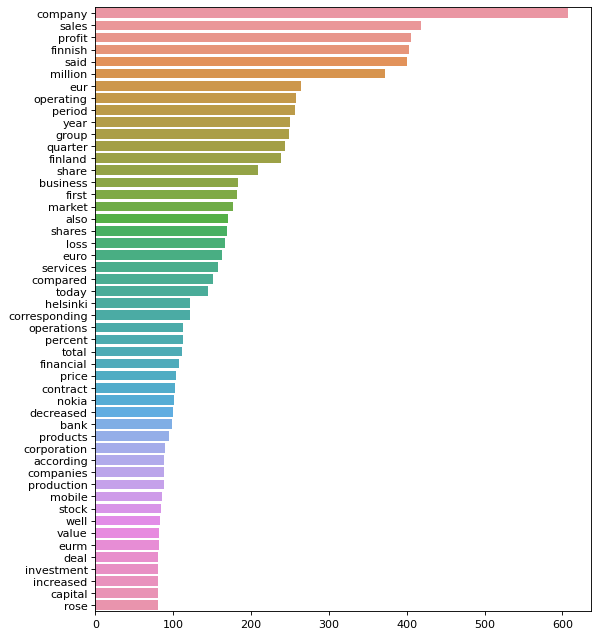

In [8]:
# barplot for top 50 frequent words
vocabulary = vocab(data_clean.Sentence)

from matplotlib.pyplot import figure

figure(figsize=(8, 10), dpi=80)
vocabulary = vocab(train_data.Sentence)

x, y= [], []
for word in list(vocabulary.keys())[:50]:
    x.append(word)

for count in list(vocabulary.values())[:50]:
    y.append(count)
sns.barplot(x=y,y=x)
print(list(vocabulary.keys())[:5])


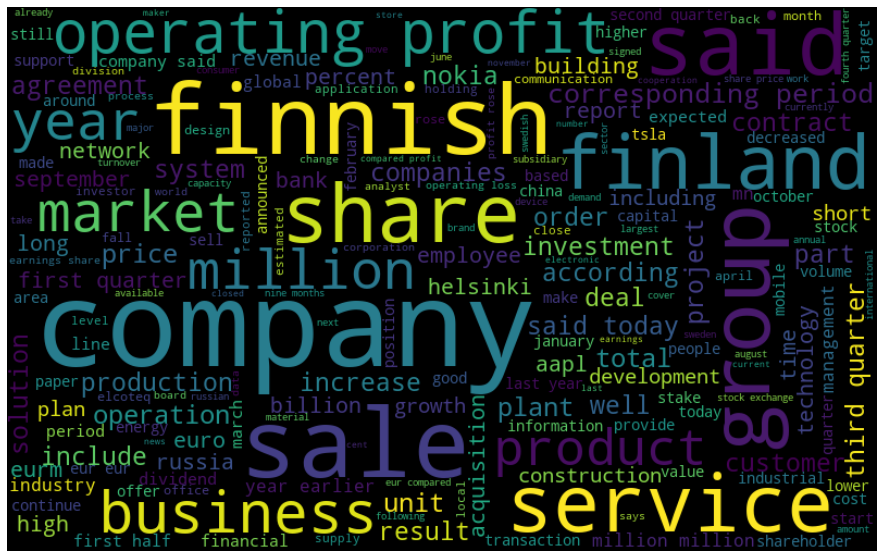

In [9]:
all_words = ' '.join([text for text in train_data.Sentence.apply(clean)])
wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize = (16, 10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

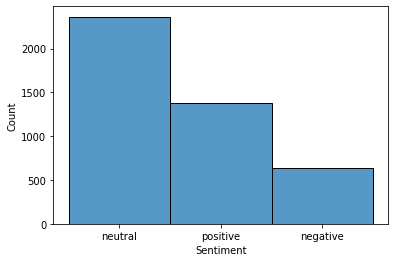

In [10]:
sns.histplot(train_data.Sentiment)

[Text(0.5, 1.0, 'Words Count')]

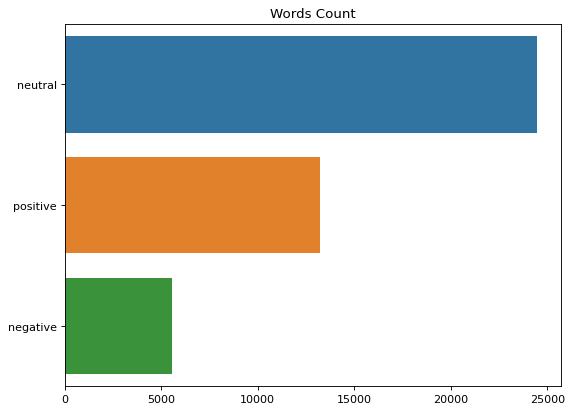

In [11]:
# sentiment category count
def sent_count(lst):
    cleaned = lst.apply(clean)
    counter = defaultdict(int)
    counter.update({'positive':0})
    counter.update({'neutral':0})
    counter.update({'negative':0})
    for i in range(len(cleaned)):
        if train_data.Sentiment[i] == 'positive':
            for word in cleaned[i].split():
                counter['positive'] += 1
        elif train_data.Sentiment[i] == 'neutral':
            for word in cleaned[i].split():
                counter['neutral'] += 1
        else:
            for word in cleaned[i].split():
                counter['negative'] += 1
    return dict(sorted(counter.items(), key=lambda item: item[1], reverse=True))

sent_counts = sent_count(train_data.Sentence)

figure(figsize=(8, 6), dpi=80)

x, y= [], []
for word in list(sent_counts.keys()):
    x.append(word)

for count in list(sent_counts.values()):
    y.append(count)
sns.barplot(x=y,y=x).set(title = "Words Count")

[Text(0.5, 1.0, 'Top 30 Words Count')]

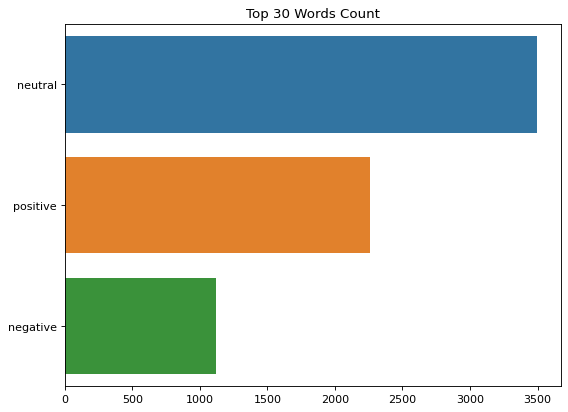

In [12]:
# number of top 30 words in each sentiment
top30 = list(vocabulary.keys())[:30]
def top30_count(lst):
    cleaned = lst.apply(clean)
    counter = defaultdict(int)
    counter.update({'positive':0})
    counter.update({'neutral':0})
    counter.update({'negative':0})
    for i in range(len(cleaned)):
        if train_data.Sentiment[i] == 'positive':
            for word in cleaned[i].split():
                if word in top30:
                    counter['positive'] += 1
        elif train_data.Sentiment[i] == 'neutral':
            for word in cleaned[i].split():
                if word in top30:
                    counter['neutral'] += 1
        else:
            if word in top30:
                for word in cleaned[i].split():
                    counter['negative'] += 1
    return dict(sorted(counter.items(), key=lambda item: item[1], reverse=True))
figure(figsize=(8, 6), dpi=80)
top30_counts = top30_count(train_data.Sentence)
x, y= [], []
for word in list(top30_counts.keys()):
    x.append(word)

for count in list(top30_counts.values()):
    y.append(count)
sns.barplot(x=y,y=x).set(title = "Top 30 Words Count")